In [2]:
# pip install -U pymoo

In [3]:
import numpy as np
import pandas as pd
import json

from data_preprocess import *
from run_ga import *
import matplotlib.pyplot as plt
import pickle

In [ ]:
tet_path = "./data/tet.json"
fdr_path = "./data/all_class_mutation/Chart-1_fdr.json"

with open(tet_path, 'r') as f:
    tet_data = json.load(f)


with open(fdr_path, 'r') as f:
    fdr_data = json.load(f)

chart_1_tet = tet_data['Chart-1']
chart_1_fdr = dict()

for key, value in fdr_data['Chart_1'].items():
    chart_1_fdr[key] = value['mutation-score']


chart_1_tet = sorted(chart_1_tet.items())
chart_1_fdr = sorted(chart_1_fdr.items())

In [ ]:
tests = [i[0] for i in chart_1_tet]
execution_times = np.array([i[1] for i in chart_1_tet])
fault_detections = np.array([i[1] for i in chart_1_fdr])

test_cases = np.column_stack((execution_times, fault_detections))
adequacy_scores = get_adequacy_scores(fault_detections)

In [ ]:
bitflip = run_nsga(test_cases, False)

In [ ]:
adeq = run_nsga_with_adequecy(test_cases, adequacy_scores, False)

In [ ]:
datadir = 'data/experiment_result'
for pkl_file in os.listdir(datadir):
        if pkl_file.endswith('adeq.pkl'):
            with open(os.path.join(datadir, pkl_file), 'rb') as f: # load pickle file for projects from merged_data
                adeq_res  = pickle.load(f)
        elif pkl_file.endswith('flip.pkl'):
            with open(os.path.join(datadir, pkl_file), 'rb') as f: # load pickle file for projects from merged_data
               bitflip_res = pickle.load(f)
            plt.scatter(bitflip_res[:, 0], bitflip_res[:, 1], label="Bitflip")
            plt.scatter(adeq_res[:, 0], adeq_res[:, 1], label="Adequacy")
            plt.xlabel("TET")
            plt.ylabel("FDR")
            plt.legend()

In [ ]:
# bitflip_res = np.abs(bitflip.F)
# adeq_res = np.abs(adeq.F)

# plt.scatter(bitflip_res[:, 0], bitflip_res[:, 1], label="Bitflip")
# plt.scatter(adeq_res[:, 0], adeq_res[:, 1], label="Adequacy")
# plt.xlabel("TET")
# plt.ylabel("FDR")
# plt.legend()

In [ ]:
# with open('data/experiment_result/f_cov_m_all/Chart_1_bitflip.pkl', 'rb') as f:
#     bitflip = pickle.load(f)

# with open('data/experiment_result/f_cov_m_cov/Chart_1_adeq.pkl', 'rb') as f:
#     adeq = pickle.load(f)
# # print(data.F)

# bitflip_res = bitflip_res = np.abs(bitflip.F)
# adeq_res = np.abs(adeq.F)

# plt.scatter(bitflip_res[:, 0], bitflip_res[:, 1], label="Bitflip")
# plt.scatter(adeq_res[:, 0], adeq_res[:, 1], label="Adequacy")
# plt.xlabel("TET")
# plt.ylabel("Effectiveness")
# plt.legend()

## Min TET

In [ ]:
types = [
    # 'f_cov_m_cov',
    # 'f_cov_m_fdr',
    # 'f_cov_m_flc',
    # 'f_cov_m_latest',
    'f_fdr_m_cov',
    'f_fdr_m_fdr',
    'f_fdr_m_flc',
    # 'f_fdr_m_latest'
]

tet_dict = {}
for type in types:
    print(type)
    for target in os.listdir('./data/merged_data'):
        pid, vid = os.path.splitext(target)[0].split('_')

        with open(f'data/experiment_result/{type}/{pid}_{vid}_bitflip.pkl', 'rb') as f:
            bitflip = pickle.load(f)

        with open(f'data/experiment_result/{type}/{pid}_{vid}_adeq.pkl', 'rb') as f:
            adeq = pickle.load(f)

        with open(f'data/merged_data/{pid}_{vid}.pkl', 'rb') as f:
            data = pickle.load(f)

        with open(f"data/failing_tests/{pid}-{vid}/failing_tests", "r") as f:
            failing_tests = f.readlines()

        min_id_adeq = None
        for i, sol in enumerate(adeq.X):
            # print(data.index[sol].shape)
            selected_tests = data.index[sol]
            if all(test in selected_tests for test in failing_tests):
                tet = adeq.F[i, 0]
                if min_id_adeq == None:
                    min_id_adeq = i
                elif tet < adeq.F[min_id_adeq, 0]:
                    min_id_adeq = i

        min_id_bitflip = None
        for i, sol in enumerate(bitflip.X):
            # print(data.index[sol].shape)
            selected_tests = data.index[sol]
            if all(test in selected_tests for test in failing_tests):
                tet = bitflip.F[i, 0]
                if min_id_bitflip == None:
                    min_id_bitflip = i
                elif tet < bitflip.F[min_id_bitflip, 0]:
                    min_id_bitflip = i

        # print("Adeq tet")
        # print(adeq.F[min_id_adeq, 0])
        # print("Bitflip tet")
        # print(bitflip.F[min_id_bitflip, 0])
        # print("\n")
        tet_dict[f"{pid}_{vid}"] = {"adeq": adeq.F[min_id_adeq, 0], "bigflip": bitflip.F[min_id_bitflip, 0]}
    # with
    print(type)
    print(tet_dict)
    with open(f"./data/experiment_result/{type}/min_tet_with_failing_tests.json", 'w') as f:
        json.dump(tet_dict, f)


## Real Mutation Result

Csv_16.pkl
Csv_16.pkl
Csv_16.pkl
Csv_16.pkl
Csv_16.pkl
Csv_16.pkl
Csv_16.pkl
Csv_16.pkl


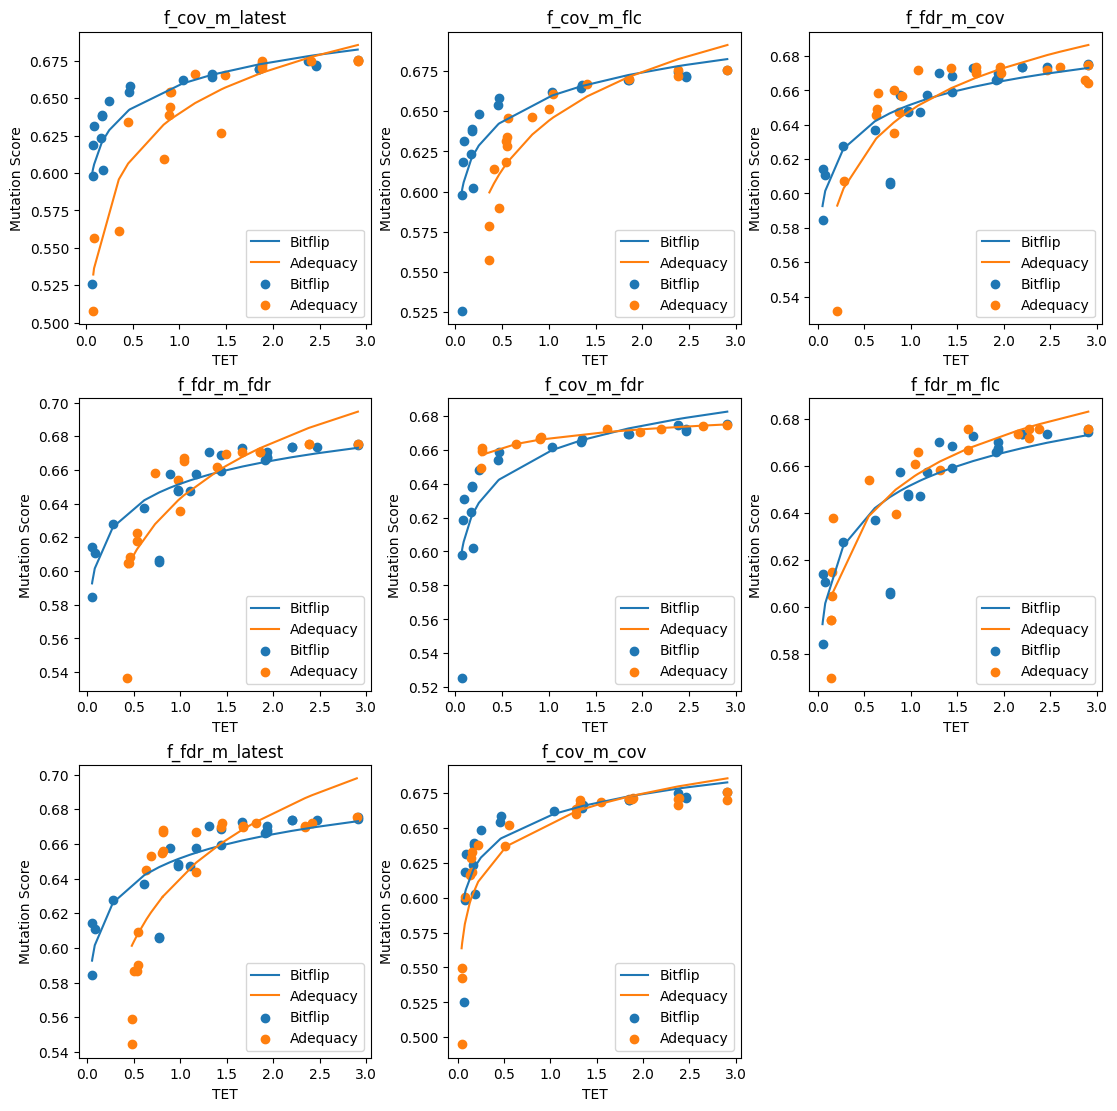

In [19]:
result_dir = "./data/experiment_result/"

plt.figure(figsize=(11, 11), constrained_layout = True)
for j, type in enumerate(os.listdir(result_dir)):
    ax = plt.subplot(3, 3, j+1)
    for target in os.listdir('./data/merged_data'):
        pid, vid = os.path.splitext(target)[0].split('_')

        # only for Csv-16####
        if pid != "Csv":
            continue
        #####################

        print(target)

        with open(f'./data/experiment_result/{type}/{pid}_{vid}_bitflip.pkl', 'rb') as f:
            bitflip = pickle.load(f)
        with open(f'./data/experiment_result/{type}/{pid}_{vid}_adeq.pkl', 'rb') as f:
            adeq = pickle.load(f)
        with open(f'./data/merged_data/{pid}_{vid}.pkl', 'rb') as f:
            merged_data = pickle.load(f)
        with open(f"./data/killmap/{pid}-{vid}_fdr.json", "rb") as f:
            killmap = json.load(f)[f"{pid}_{vid}"]
        with open(f"./data/all_class_mutation/{pid}-{vid}_fdr.json", "rb") as f:
            fdr = json.load(f)[f"{pid}_{vid}"]

        total_mutant = fdr[list(fdr.keys())[0]]["mutants-generated"]
        
        bitflip_result = []
        adeq_result = []
        for i, sol in enumerate(bitflip.X):
            bitflip_kill = set()
            for test in merged_data.index[sol]:
                if test in killmap:
                    bitflip_kill = bitflip_kill.union(set(killmap[test]))
            mut_score = len(bitflip_kill) / total_mutant
            bitflip_result.append([bitflip.F[i][0], mut_score])
        
        for i, sol in enumerate(adeq.X):
            adeq_kill = set()
            for test in merged_data.index[sol]:
                if test in killmap:
                    adeq_kill = adeq_kill.union(set(killmap[test]))
            mut_score = len(adeq_kill) / total_mutant
            adeq_result.append([adeq.F[i][0], mut_score])
        
        bitflip_result = np.array(bitflip_result)
        adeq_result = np.array(adeq_result)
        
        bitflip_result = bitflip_result[bitflip_result[:, 0].argsort()]
        adeq_result = adeq_result[adeq_result[:, 0].argsort()]

        x_b = bitflip_result[:, 0]
        x_a = adeq_result[:, 0]

        # 2차 함수로 fitting
        # fit_bitflip = np.polyfit(bitflip_result[:, 0], bitflip_result[:, 1], 2)
        # fit_adeq = np.polyfit(adeq_result[:, 0], adeq_result[:, 1], 2)
        # plt.plot(x_b, fit_bitflip[0] * (x_b ** 2) + fit_bitflip[1] * (x_b ** 1) + fit_bitflip[2], label="Bitflip")
        # plt.plot(x_a, fit_adeq[0] * (x_a ** 2) + fit_adeq[1] * (x_a ** 1) + fit_adeq[2], label="Adequacy")

        # log 함수로 fitting
        fit_bitflip = np.polyfit(np.log(bitflip_result[:, 0]), bitflip_result[:, 1], 1)
        fit_adeq = np.polyfit(np.log(adeq_result[:, 0]), adeq_result[:, 1], 1)
        plt.plot(x_b, fit_bitflip[0] * np.log(x_b) + fit_bitflip[1], label="Bitflip")
        plt.plot(x_a, fit_adeq[0] * np.log(x_a) + fit_adeq[1], label="Adequacy")


        plt.scatter(bitflip_result[:, 0], bitflip_result[:, 1], label="Bitflip")
        plt.scatter(adeq_result[:, 0], adeq_result[:, 1], label="Adequacy")

        plt.xlabel("TET")
        plt.ylabel("Mutation Score")
        plt.title(type)
    plt.legend()

## Pareto Dominance Comparison

In [39]:
def dominates(point1, point2):
    return all(x <= y for x, y in zip(point1, point2)) and any(x < y for x, y in zip(point1, point2))
    # return any(x <= y for x, y in zip(point1, point2))
    #return all(x <= y for x, y in zip(point1, point2)) or all(x >= y for x, y in zip(point1, point2))

In [40]:
result_dir = "./data/experiment_result/"

for j, type in enumerate(os.listdir(result_dir)):
    for target in os.listdir('./data/merged_data'):
        pid, vid = os.path.splitext(target)[0].split('_')

        # only for Csv-16####
        if pid != "Csv":
            continue
        #####################

        print(type)

        with open(f'./data/experiment_result/{type}/{pid}_{vid}_bitflip.pkl', 'rb') as f:
            bitflip = pickle.load(f)
        with open(f'./data/experiment_result/{type}/{pid}_{vid}_adeq.pkl', 'rb') as f:
            adeq = pickle.load(f)
        with open(f'./data/merged_data/{pid}_{vid}.pkl', 'rb') as f:
            merged_data = pickle.load(f)
        with open(f"./data/killmap/{pid}-{vid}_fdr.json", "rb") as f:
            killmap = json.load(f)[f"{pid}_{vid}"]

        total_mutant = fdr[list(fdr.keys())[0]]["mutants-generated"]
        
        bitflip_result = []
        adeq_result = []
        for i, sol in enumerate(bitflip.X):
            bitflip_kill = set()
            for test in merged_data.index[sol]:
                if test in killmap:
                    bitflip_kill = bitflip_kill.union(set(killmap[test]))
            mut_score = len(bitflip_kill) / total_mutant
            bitflip_result.append([bitflip.F[i][0], mut_score])
        
        for i, sol in enumerate(adeq.X):
            adeq_kill = set()
            for test in merged_data.index[sol]:
                if test in killmap:
                    adeq_kill = adeq_kill.union(set(killmap[test]))
            mut_score = len(adeq_kill) / total_mutant
            adeq_result.append([adeq.F[i][0], mut_score])
        
        combined_set = bitflip_result + adeq_result

        pareto_frontier = []
        for point in combined_set:
            if not any(dominates(other_point, point) for other_point in combined_set if other_point != point):
                pareto_frontier.append(point)

        bitflip_contribution = sum(1 for point in pareto_frontier if point in bitflip_result)
        adeq_contribution = sum(1 for point in pareto_frontier if point in adeq_result)

        print(bitflip_contribution, adeq_contribution)
        

f_cov_m_latest
1 1
f_cov_m_flc
1 0
f_fdr_m_cov
1 1
f_fdr_m_fdr
1 1
f_cov_m_fdr
1 0
f_fdr_m_flc
1 1
f_fdr_m_latest
1 1
f_cov_m_cov
0 1
